# <center> ASSIGNMENT 1 </center>
## <center>  Working with Python packages-Numpy, Scipy, Scikit-Learn, Matplotlib</center>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif, chi2

## Loan Dataset

In [10]:
loan = pd.read_csv(r"./datasets/dataset1_Loan.csv")

In [11]:
print(loan.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [12]:
print(len(loan[loan["Loan_Status"]=="Y"]))
print(len(loan[loan["Loan_Status"]=="N"]))
loan.info()

422
192
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


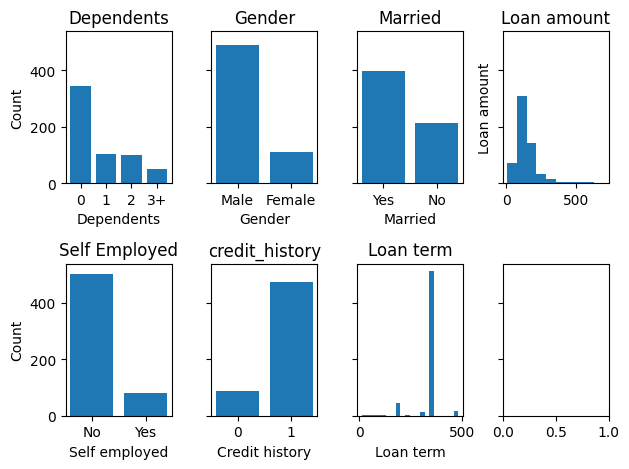

In [13]:

# loan["Dependents"].fillna("0",inplace=True)

dependents = loan["Dependents"].value_counts()
gender = loan["Gender"].value_counts()
married = loan["Married"].value_counts()
self_employed = loan["Self_Employed"].value_counts()
credit_history = loan["Credit_History"].value_counts()
loan_term = loan["Loan_Amount_Term"].value_counts()

fig,ax = plt.subplots(2,4,sharey=True)
ax[0,0].set_title("Dependents")
ax[0,0].bar(dependents.index, dependents.values)
ax[0,0].set_ylabel("Count")
ax[0,0].set_xlabel("Dependents")

ax[0,1].set_title("Gender")
ax[0,1].bar(gender.index,gender.values)
ax[0,1].set_xlabel("Gender")

ax[0,2].set_title("Married")
ax[0,2].bar(married.index,married.values)
ax[0,2].set_xlabel("Married")

ax[0,3].set_title("Loan amount")
ax[0,3].hist(loan["LoanAmount"])
ax[0,3].set_ylabel("Loan amount")

ax[1,0].set_title("Self Employed")
ax[1,0].set_ylabel("Count")
ax[1,0].set_xlabel("Self employed")
ax[1,0].bar(self_employed.index, self_employed.values)

ax[1,1].set_title("credit_history")
ax[1,1].set_xlabel("Credit history")
ax[1,1].bar(credit_history.index,credit_history.values)

ax[1,2].set_title("Loan term")
ax[1,2].set_xlabel("Loan term")
# ax[1,2].bar(loan_term.index,loan_term.values)
ax[1,2].hist(loan["Loan_Amount_Term"], bins=20)

plt.tight_layout()
plt.show()

<Axes: >

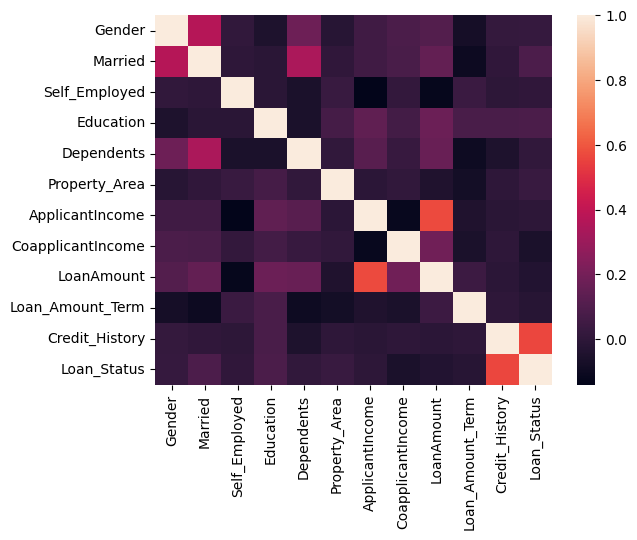

In [14]:

loan["Gender"] = loan["Gender"].map({"Male": 1, "Female": 0})
loan["Married"] = loan["Married"].map({"Yes": 1, "No": 0})
loan["Self_Employed"] = loan["Self_Employed"].map({"Yes": 0, "No": 1})
loan["Education"] = loan["Education"].map({"Graduate": 1, "Not Graduate": 0})
loan["Dependents"] = loan["Dependents"].map({"0": 0, "1": 1, "2": 2, "3+": 3})
loan["Property_Area"] = loan["Property_Area"].map({"Urban": 2, "Semiurban": 1, "Rural": 0})
loan["Loan_Status"] = loan["Loan_Status"].map({"Y": 1, "N": 0})


loan = loan[["Gender", "Married", "Self_Employed", "Education", "Dependents", "Property_Area","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History", "Loan_Status"]]

sns.heatmap(loan.corr())

In [15]:
loan["Dependents"] = loan["Dependents"].fillna(loan["Dependents"].mode())
loan["Gender"] = loan["Gender"].fillna(loan["Gender"].mode())
loan["Married"] = loan["Married"].fillna(loan["Married"].mode())
loan["Self_Employed"] = loan["Self_Employed"].fillna(loan["Self_Employed"].mode())
loan["Credit_History"] = loan["Credit_History"].fillna(loan["Credit_History"].mode())
loan["Loan_Amount_Term"] = loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mode())
loan["LoanAmount"] = loan["LoanAmount"].fillna(loan["LoanAmount"].median())

In [39]:
X = loan.drop('Loan_Status', axis=1)

X.fillna(X.median(), inplace=True)
y = loan['Loan_Status']


selector = SelectKBest(score_func=f_classif, k=7)
fit = selector.fit(X, y)
scores = [{"Column":X.columns[k],"Score":fit.scores_[k],"P value":fit.pvalues_[k]} for k in range(len(X.columns))]


output = pd.DataFrame(scores)
output.sort_values("P value")


,Column,Score,P value
10,Credit_History,252.652090,7.019682e-48
1,Married,5.164552,2.339836e-02
3,Education,4.547685,3.336068e-02
7,CoapplicantIncome,2.151457,1.429483e-01
8,LoanAmount,0.675896,4.113237e-01
5,Property_Area,0.631733,4.270284e-01
9,Loan_Amount_Term,0.311334,5.770668e-01
0,Gender,0.198059,6.564498e-01
4,Dependents,0.062665,8.024165e-01
6,ApplicantIncome,0.013574,9.072878e-01


## Iris

In [17]:
iris = pd.read_csv(r"./datasets/dataset1_Iris.csv")
print(iris.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [18]:
virginica = iris[iris["Species"]=="Iris-virginica"]
setosa = iris[iris["Species"]=="Iris-setosa"]
versicolor = iris[iris["Species"]=="Iris-versicolor"]



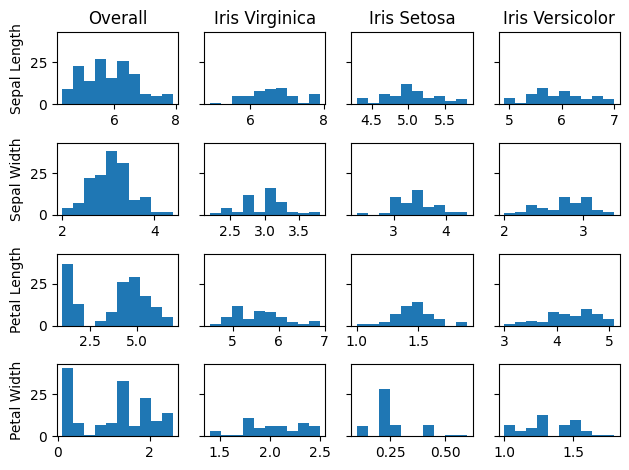

In [19]:
fig,ax = plt.subplots(nrows=4,ncols=4,sharey=True)
attr = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

title = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]


for i in range(4):
    ax[i,0].hist(iris[attr[i]])
    ax[i,0].set_ylabel(title[i])
    
    ax[i,1].hist(virginica[attr[i]])

    ax[i,2].hist(setosa[attr[i]])

    ax[i,3].hist(versicolor[attr[i]])
    if i!=0:
        continue
    ax[i,0].set_title("Overall")
    ax[i,2].set_title("Iris Setosa")
    ax[i,1].set_title("Iris Virginica")
    ax[i,3].set_title("Iris Versicolor")

plt.tight_layout()
plt.show()


In [20]:
iris["Species"].tail()

iris["Species"] = iris["Species"].map({"Iris-setosa":0, "Iris-versicolor": 1, "Iris-virginica": 2})

<Axes: >

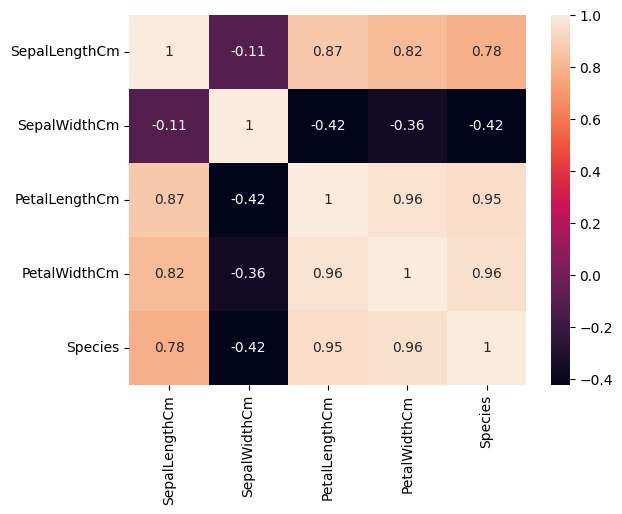

In [21]:
sns.heatmap(iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm","Species"]].corr(), annot=True)

In [22]:
X = iris.drop(["Species","Id"], axis=1)
y = iris["Species"]



selector = SelectKBest(score_func=f_classif,k="all")
fit = selector.fit(X,y)
scores = [{"Column":X.columns[k],"Score":fit.scores_[k],"P value":fit.pvalues_[k]} for k in range(len(X.columns))]


output = pd.DataFrame(scores)
output.sort_values("P value")



,Column,Score,P value
2,PetalLengthCm,1179.034328,3.051976e-91
3,PetalWidthCm,959.324406,4.376957e-85
0,SepalLengthCm,119.264502,1.669669e-31
1,SepalWidthCm,47.364461,1.327917e-16


## handwritten digits

In [23]:
handwritten_digits = pd.read_csv(r'datasets\dataset1_Numbers.csv')

handwritten_digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 65 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Label1   3823 non-null   int64
 1   Label2   3823 non-null   int64
 2   Label3   3823 non-null   int64
 3   Label4   3823 non-null   int64
 4   Label5   3823 non-null   int64
 5   Label6   3823 non-null   int64
 6   Label7   3823 non-null   int64
 7   Label8   3823 non-null   int64
 8   Label9   3823 non-null   int64
 9   Label10  3823 non-null   int64
 10  Label11  3823 non-null   int64
 11  Label12  3823 non-null   int64
 12  Label13  3823 non-null   int64
 13  Label14  3823 non-null   int64
 14  Label15  3823 non-null   int64
 15  Label16  3823 non-null   int64
 16  Label17  3823 non-null   int64
 17  Label18  3823 non-null   int64
 18  Label19  3823 non-null   int64
 19  Label20  3823 non-null   int64
 20  Label21  3823 non-null   int64
 21  Label22  3823 non-null   int64
 22  Label23  3823 non-null  

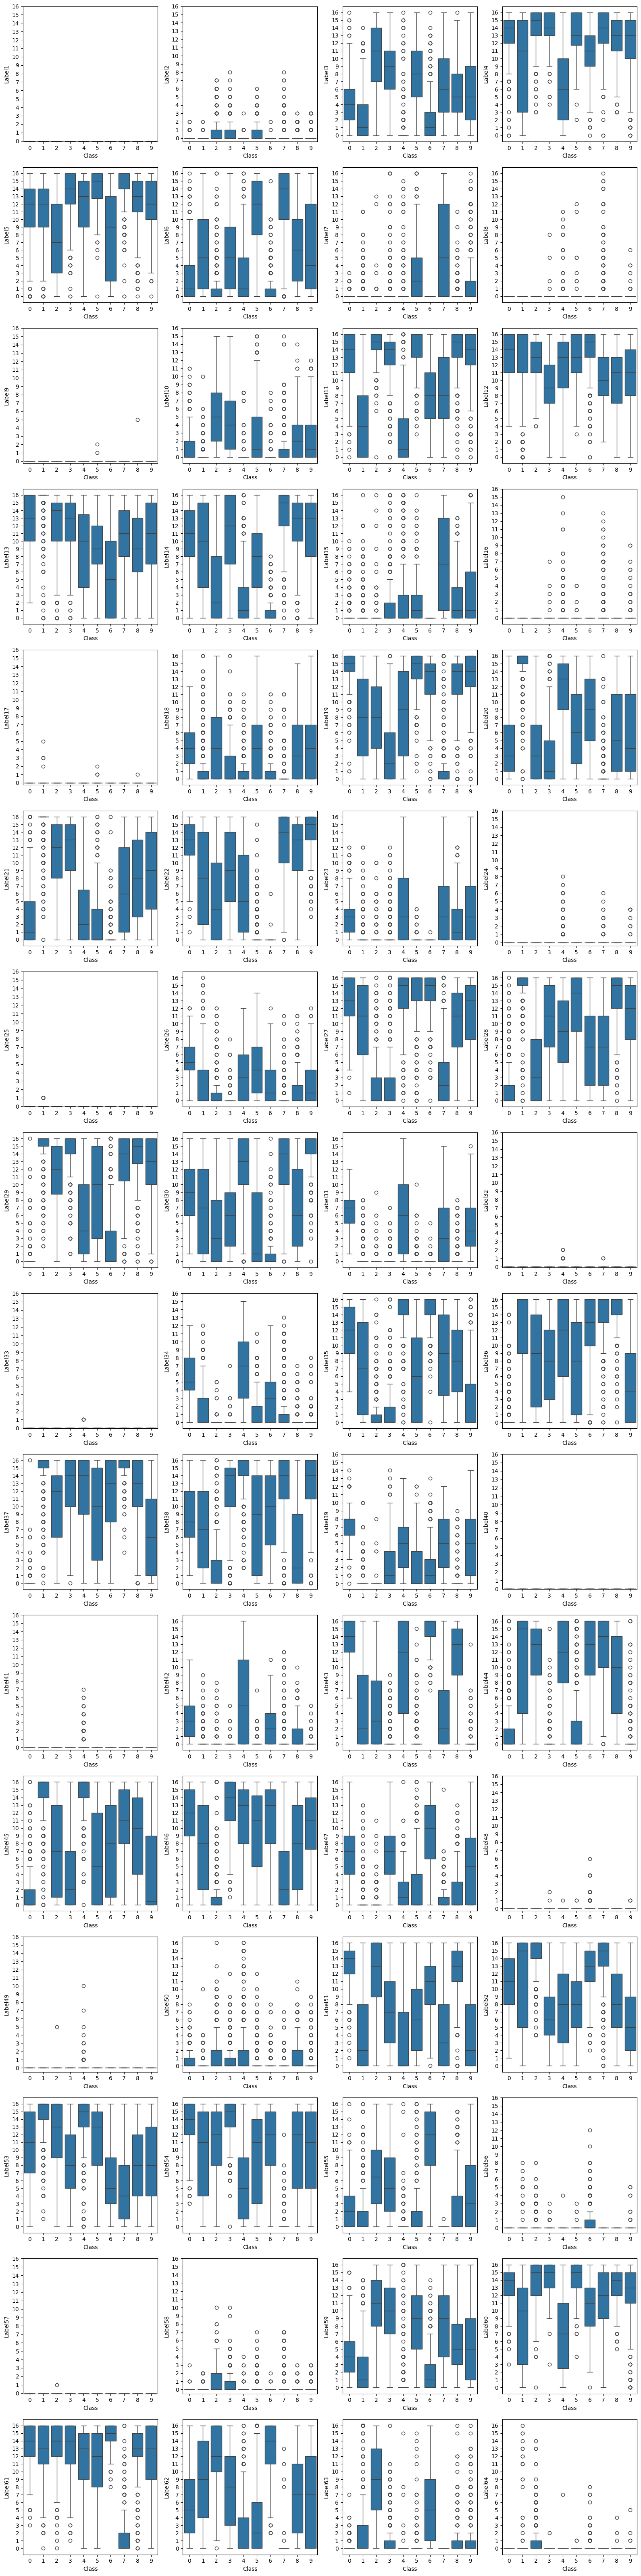

In [24]:
X = handwritten_digits.drop("Class", axis = 1)
y = handwritten_digits["Class"]

fig,axs = plt.subplots(nrows = 16, ncols = 4, figsize=(16,64))

axs = axs.flatten()

for i in range(64):
    sns.boxplot(y = X[f"Label{i+1}"],x=y,ax=axs[i])
    axs[i].set_xticks([0,1,2,3,4,5,6,7,8,9])
    axs[i].set_yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

plt.tight_layout()
plt.show()




In [25]:
X = handwritten_digits.drop("Class", axis=1)
y = handwritten_digits["Class"]



selector = SelectKBest(score_func=f_classif,k="all")
fit = selector.fit(X,y)
scores = [{"Column":X.columns[k],"Score":fit.scores_[k],"P value":fit.pvalues_[k]} for k in range(len(X.columns))]


output = pd.DataFrame(scores)
output.sort_values("P value")

C:\Users\Administrator\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 0 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Column,Score,P value
2,Label3,283.884667,0.000000
5,Label6,307.868331,0.000000
13,Label14,370.861892,0.000000
10,Label11,458.746026,0.000000
21,Label22,504.786082,0.000000
...,...,...,...
16,Label17,3.180738,0.000773
8,Label9,1.033800,0.409931
56,Label57,1.006741,0.431917
0,Label1,NaN,NaN


## email classification

In [26]:
email = pd.read_csv("./datasets/dataset1_Spammail.csv")
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

<BarContainer object of 2 artists>

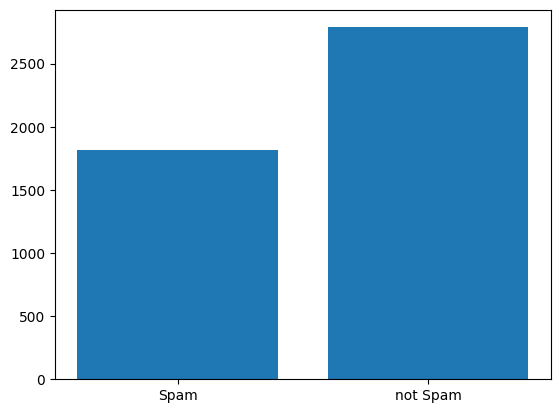

In [27]:
plt.bar(["Spam", "not Spam"], [len(email[email["class"]==1]),len(email[email["class"]==0])])

<Axes: >

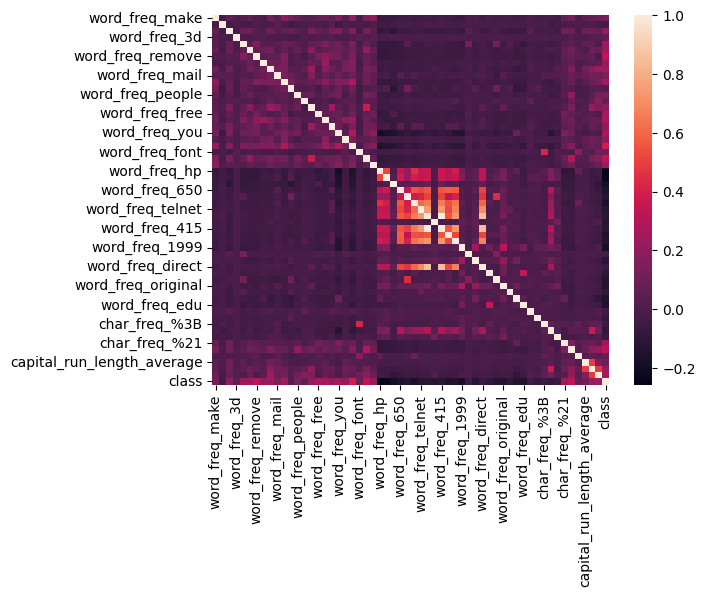

In [28]:
sns.heatmap(email.corr())

In [29]:
X = email.drop("class", axis=1)
y = email["class"]



selector = SelectKBest(score_func=f_classif,k=48)
fit = selector.fit(X,y)
scores = [{"Column":X.columns[k],"Score":fit.scores_[k],"P value":fit.pvalues_[k]} for k in range(len(X.columns))]


output = pd.DataFrame(scores)
output.sort_values("P value")

,Column,Score,P value
20,word_freq_your,791.726012,7.214605e-161
22,word_freq_000,580.534452,6.730650e-121
6,word_freq_remove,570.169634,6.791279e-119
52,char_freq_%24,538.029935,1.179720e-112
18,word_freq_you,372.273985,7.929843e-80
15,word_freq_free,342.346240,8.836715e-74
16,word_freq_business,342.316290,8.961102e-74
24,word_freq_hp,324.490814,3.734528e-70
56,capital_run_length_total,304.417709,4.623754e-66
4,word_freq_our,285.890659,2.872077e-62


## Diabetes

In [30]:
diabetes = pd.read_csv(r"datasets\dataset1_Diabetes.csv")
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [31]:
diabetes.describe()

continuous = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]
categorical = ["HighBP","HighChol","CholCheck","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","Sex"]


Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64


<BarContainer object of 3 artists>

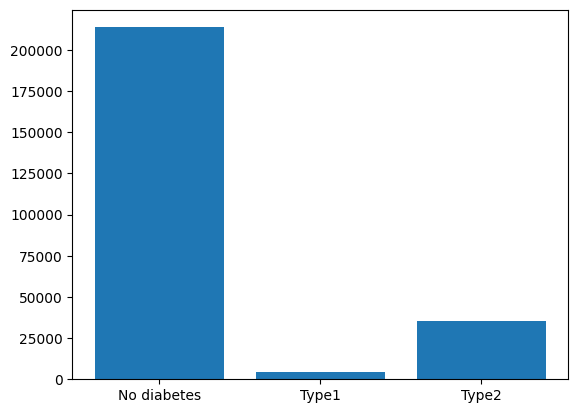

In [32]:
print(diabetes["Diabetes_012"].value_counts())
plt.bar(["No diabetes", "Type1", "Type2"], [len(diabetes[diabetes["Diabetes_012"]==0]),len(diabetes[diabetes["Diabetes_012"]==1]),len(diabetes[diabetes["Diabetes_012"]==2])])

In [33]:
## mergining type 1 and tpye 2 cause the class imbalance

diabetes["Diabetes_012"] = diabetes["Diabetes_012"].map({0:0,1:1,2:1})



Diabetes_012
0    213703
1     39977
Name: count, dtype: int64


<BarContainer object of 2 artists>

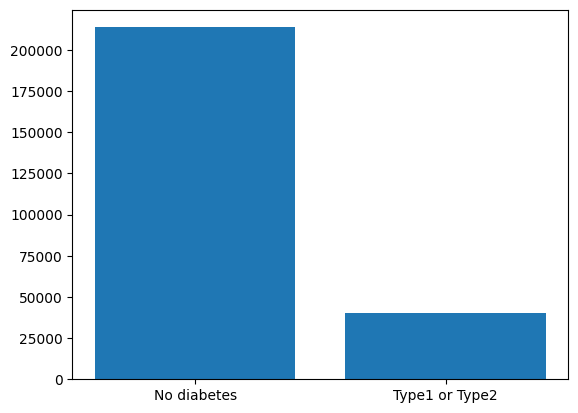

In [34]:
print(diabetes["Diabetes_012"].value_counts())
plt.bar(["No diabetes", "Type1 or Type2"], [len(diabetes[diabetes["Diabetes_012"]==0]),len(diabetes[diabetes["Diabetes_012"]==1])])

<Axes: >

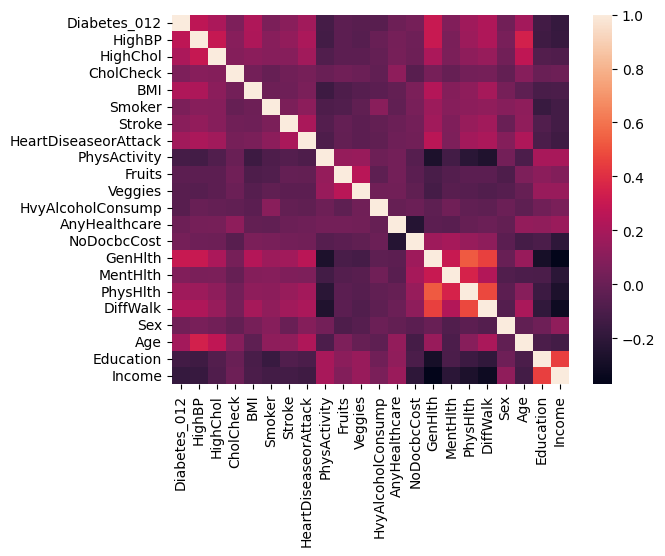

In [35]:
sns.heatmap(diabetes.corr())

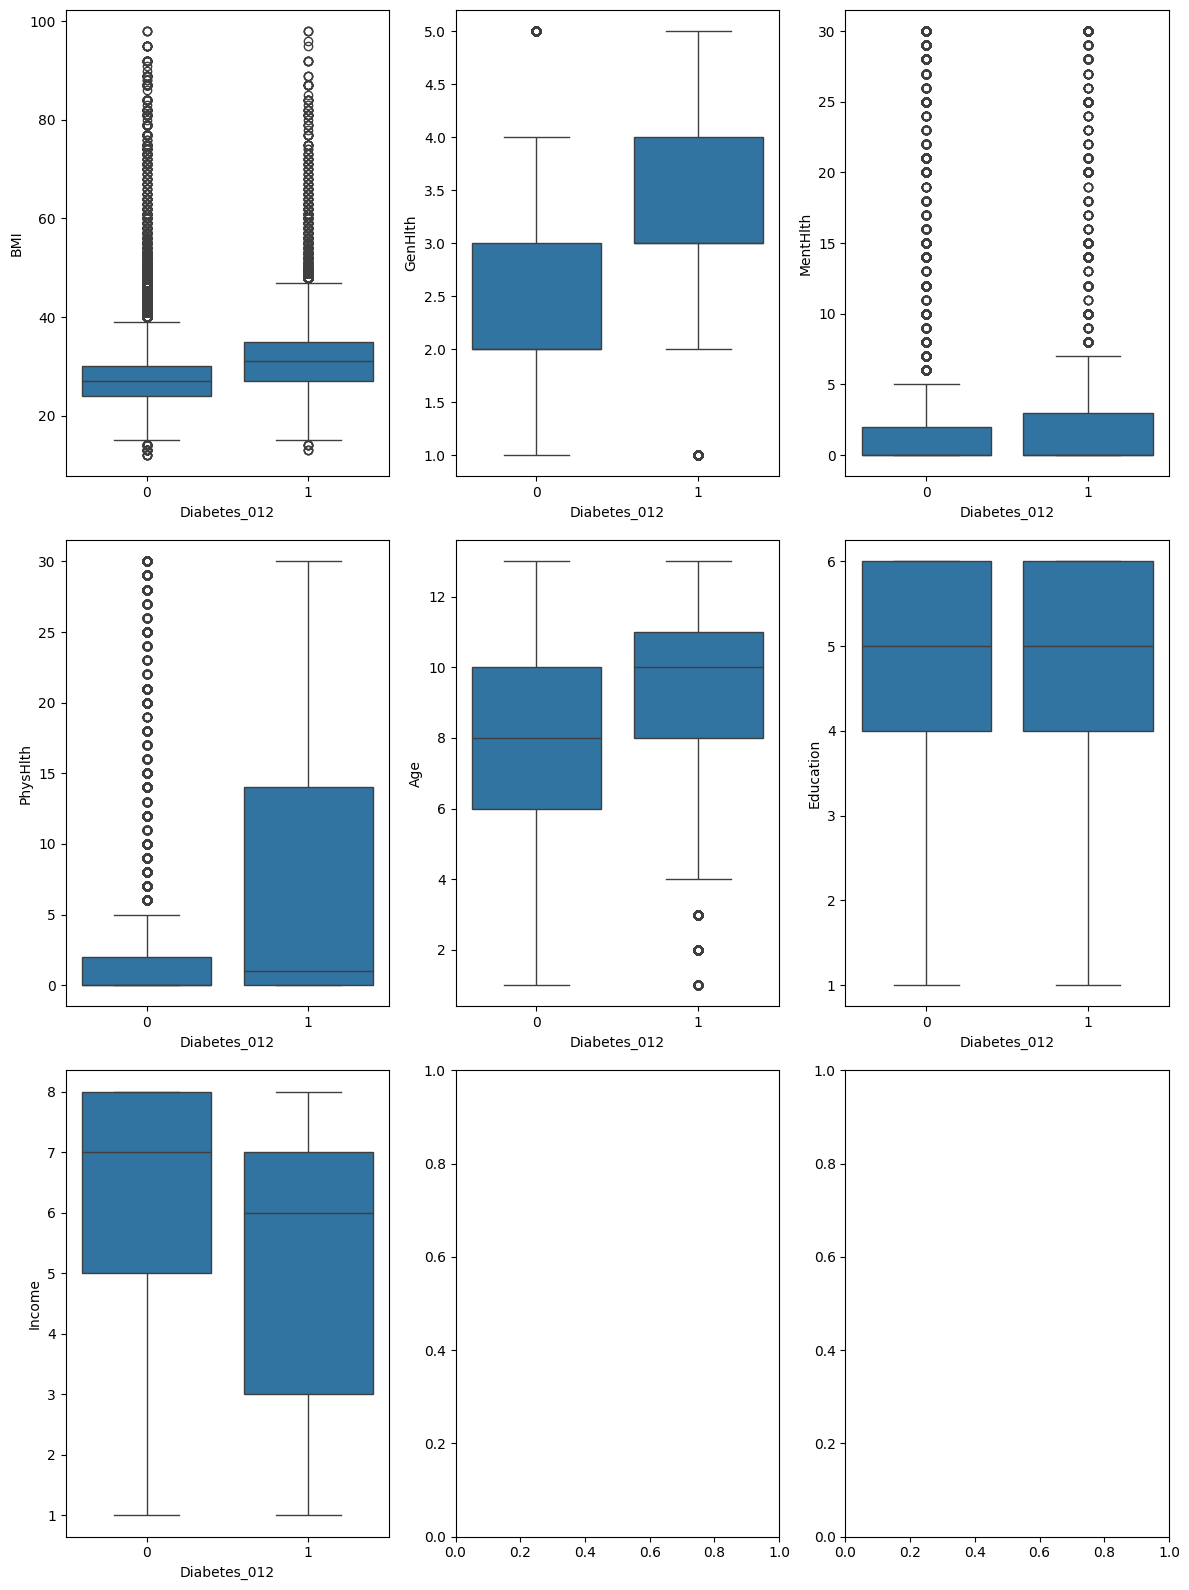

In [36]:
fig,axes = plt.subplots(nrows = 3,ncols = 3, figsize = (12,16))
axes = axes.flatten()
for i in range(7):
    sns.boxplot(x=diabetes["Diabetes_012"],y=diabetes[continuous[i]],ax=axes[i])

##education is irrelevent

plt.tight_layout()
plt.show()

<Axes: >

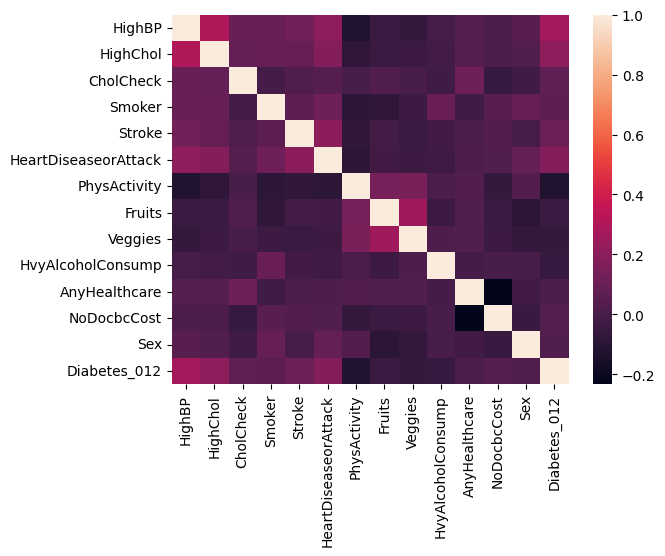

In [37]:
sns.heatmap(diabetes[[*categorical,"Diabetes_012"]].corr())

In [38]:
X_cont = diabetes[continuous]
X_cat = diabetes[categorical]
y = diabetes['Diabetes_012']

f_scores, p_values_cont = f_classif(X_cont, y)
chi_scores, p_values_cat = chi2(X_cat,y)

scores = list(f_scores)+list(chi_scores)
p_values = list(p_values_cont)+list(p_values_cat)
X = continuous+categorical
scores = [{"Column":X[k],"Score":scores[k],"P value":p_values[k], "Test": ("Anova" if k<len(continuous) else "Chi square")} for k in range(len(X))]


output = pd.DataFrame(scores)
output.sort_values("P value")


,Column,Score,P value,Test
0,BMI,13382.153421,0.000000e+00,Anova
1,GenHlth,25233.520776,0.000000e+00,Anova
3,PhysHlth,8009.451199,0.000000e+00,Anova
4,Age,9079.734633,0.000000e+00,Anova
6,Income,7807.367493,0.000000e+00,Anova
5,Education,4484.838371,0.000000e+00,Anova
7,HighBP,10585.790180,0.000000e+00,Chi square
8,HighChol,6460.310201,0.000000e+00,Chi square
12,HeartDiseaseorAttack,7193.573093,0.000000e+00,Chi square
11,Stroke,2673.124819,0.000000e+00,Chi square
